In [1]:
import pandas as pd
print(pd.__version__)

1.4.2


## Load dataset

In [4]:

df=pd.read_csv('loan.csv')

C:\Users\DELL\AppData\Local\Temp\ipykernel_2560\2409609173.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('loan.csv')


In [5]:
df.duplicated().sum()

0

In [6]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:

df.shape

(39717, 111)

In [8]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Filling and Cleaning

In [10]:
df = df[df.columns[~df.isnull().all()]]

In [11]:
df.isnull().sum()/len(df)*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [12]:
df.drop(['collection_recovery_fee'],inplace=True,axis=1)
#Here we are not concerned about collection_recovery_fee how the applicant has paid because it is helping us in gaining insights for the applicant will default or not 

In [13]:
# since the most occurring value is US Army so we are filling the emp_title's NA Value with US Army
df['emp_title'].mode() 

0    US Army
Name: emp_title, dtype: object

In [14]:
df['emp_title'].fillna(df['emp_title'].mode, inplace=True)

In [15]:
df.isnull().sum()/len(df)*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      0.000000
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [16]:
# we are dropping this because it is 92% missing values
df.drop(['mths_since_last_record'],inplace=True,axis=1)

In [17]:
df.drop(['next_pymnt_d'],inplace=True,axis=1)

In [18]:









df.isnull().sum()/len(df)*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      0.000000
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [19]:
df['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [20]:
df['pub_rec_bankruptcies'].median()

0.0

In [21]:
















#it is showing no of times applicant is not able to pay his debt
#Because median handles the outlier we are filling with the median values
df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].median, inplace=True)


In [22]:

df.isnull().sum()/len(df)*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      0.000000
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [23]:
df['desc'].unique()

array(['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>',
       '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>',
       nan, ...,
       'Our current gutter system on our home is old and in need of repair.    We will be using the borrowed funds to replace the gutter system on our home.',
       'The rate of interest and fees incurred by carrying a balance on my credit card are so outrageous at this point that continuing

In [24]:
# desc didn't add any value for insights 
df.drop(['desc'],inplace=True,axis=1)

In [25]:
df['chargeoff_within_12_mths'].mean()

0.0

In [26]:

df['chargeoff_within_12_mths'].value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [27]:
#That applicant may have some charge-off, 0 indicates he doesn't have any charge-offs
df['chargeoff_within_12_mths'].unique()

array([ 0., nan])

In [28]:
# We have replaced NA as 1 becuase 1 indicates that applicant may have some charge-off, 0 indicates he doesn't have any charge-offs
df['chargeoff_within_12_mths'].fillna(1, inplace=True)

df['chargeoff_within_12_mths'].unique()

array([0., 1.])

In [29]:



# Collection here is no of loans which applicant has taken apart from medical loan
#0 means there were no loans and hence we are filling with 1 indicating X no of loans applicant has taken
df['collections_12_mths_ex_med'].unique()

array([ 0., nan])

In [30]:
df['collections_12_mths_ex_med'].fillna(1, inplace=True)

In [31]:
df['last_pymnt_d'].unique()

array(['Jan-15', 'Apr-13', 'Jun-14', 'May-16', 'Apr-12', 'Nov-12',
       'Jun-13', 'Sep-13', 'Jul-12', 'Oct-13', 'May-13', 'Feb-15',
       'Aug-15', 'Oct-12', 'Sep-12', nan, 'Dec-12', 'Dec-14', 'Aug-13',
       'Nov-13', 'Jan-14', 'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12',
       'Jul-14', 'Jul-13', 'Jan-16', 'Feb-16', 'Apr-15', 'Feb-14',
       'Sep-14', 'Jun-12', 'Feb-13', 'Mar-13', 'May-14', 'Mar-15',
       'Jan-13', 'Dec-13', 'Feb-12', 'Mar-14', 'Sep-15', 'Nov-15',
       'Mar-16', 'Jan-12', 'Oct-15', 'Nov-14', 'Mar-12', 'May-12',
       'Apr-16', 'Dec-15', 'Jun-15', 'May-15', 'Jul-15', 'Dec-11',
       'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10', 'Dec-09',
       'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09', 'Jun-09',
       'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09', 

In [32]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq      

In [33]:
# We are not concerned about the month/date , as thry are not adding any explanatory value or insights
df.drop(['last_pymnt_d'],inplace=True,axis=1)

In [34]:
df.isnull().sum()/len(df)*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      0.000000
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000


In [35]:
df['last_credit_pull_d'].unique()

array(['May-16', 'Sep-13', 'Apr-16', 'Jan-16', 'Dec-14', 'Aug-12',
       'Mar-13', 'Dec-15', 'Aug-13', 'Nov-12', 'Mar-14', 'Apr-15',
       'May-14', 'Jul-15', 'Feb-16', 'Mar-16', 'Sep-12', 'May-13',
       'Jan-15', 'Jun-12', 'Mar-15', 'Dec-12', 'Sep-14', 'Feb-14',
       'Jun-15', 'Oct-13', 'Apr-14', 'Oct-14', 'Feb-13', 'Nov-15',
       'Jul-14', 'Sep-15', 'Oct-12', 'Nov-13', 'Nov-14', 'Feb-12',
       'Oct-15', 'Apr-12', 'Aug-15', 'Jun-14', 'Jan-12', 'Aug-14',
       'Jun-13', 'Dec-13', 'May-12', 'Jul-12', 'Jan-14', 'Jul-13',
       'Apr-13', 'May-15', 'Feb-15', 'Mar-12', 'Nov-11', 'Dec-11',
       'Jan-13', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', nan, 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Feb-10', 'Mar-10', 'Aug-07', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Jul-09', 'Aug-09',
       'May-09', 'Jun-09', 'Apr-09', 'Mar-09', 'Feb-09', 

In [36]:





df.drop(['last_credit_pull_d'],inplace=True,axis=1)

In [37]:
df.isnull().sum()/len(df)

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.000000
emp_length                    0.027066
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.000277
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [38]:
df.isnull().sum()/len(df)

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.000000
emp_length                    0.027066
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.000277
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [39]:
df['dti'].duplicated().sum()

36849

In [40]:
df['title'].duplicated().sum()

20101

In [41]:
df['title'].mode()

0    Debt Consolidation
Name: title, dtype: object

In [42]:
df.drop_duplicates(['title'],inplace=True)

In [43]:
df['title'].duplicated().sum()

0

In [44]:
df['title'].fillna(df['title'].mode, inplace=True)


In [45]:
df.isnull().sum()/len(df)

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.000000
emp_length                    0.026560
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.000000
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [46]:



df['emp_length'] = df['emp_length'].str.replace('year','')

In [47]:
df['emp_length'].unique()







array(['10+ s', '< 1 ', '1 ', '3 s', '8 s', '9 s', '4 s', '5 s', '6 s',
       '2 s', '7 s', nan], dtype=object)

In [48]:


df['emp_length'] = df['emp_length'].str.replace('years','')

In [49]:
df['emp_length'].unique()

array(['10+ s', '< 1 ', '1 ', '3 s', '8 s', '9 s', '4 s', '5 s', '6 s',
       '2 s', '7 s', nan], dtype=object)

In [50]:
df['emp_length'] = df['emp_length'].str.replace('s','')

In [51]:
df['emp_length'].unique()

array(['10+ ', '< 1 ', '1 ', '3 ', '8 ', '9 ', '4 ', '5 ', '6 ', '2 ',
       '7 ', nan], dtype=object)

In [52]:
df['emp_length'] = df['emp_length'].str.replace('< 1','0')

In [53]:
df['emp_length'].unique()

array(['10+ ', '0 ', '1 ', '3 ', '8 ', '9 ', '4 ', '5 ', '6 ', '2 ', '7 ',
       nan], dtype=object)

In [54]:







df['emp_length'] = df['emp_length'].str.replace('+',' ')

C:\Users\DELL\AppData\Local\Temp\ipykernel_2560\980952395.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['emp_length'] = df['emp_length'].str.replace('+',' ')


In [55]:
df['emp_length'].unique()

array(['10  ', '0 ', '1 ', '3 ', '8 ', '9 ', '4 ', '5 ', '6 ', '2 ', '7 ',
       nan], dtype=object)

In [56]:
df['emp_length'].unique()

array(['10  ', '0 ', '1 ', '3 ', '8 ', '9 ', '4 ', '5 ', '6 ', '2 ', '7 ',
       nan], dtype=object)

In [57]:
df['emp_length']=df['emp_length'].astype(float)

In [58]:
df['emp_length'].dtypes

dtype('float64')

In [59]:



df['emp_length'].median()

4.0

In [60]:
df['emp_length'].fillna(4.0,inplace=True)
#df['emp_length'] = df['emp_length'].fillna(method = 'ffill')

In [61]:
#df['emp_length'].str.strip(df['emp_length'])

In [62]:
df['emp_length'].isna().sum()

0

In [63]:
df['emp_length'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7.])

In [64]:
df['emp_length']=df['emp_length'].astype('str')

In [65]:
df['revol_util'].unique()


array(['83.70%', '9.40%', '98.50%', ..., '5.34%', '49.63%', '0.04%'],
      dtype=object)

In [66]:
df['revol_util'] = df['revol_util'].str.replace('%',' ')

In [67]:


df['revol_util']

0        83.70 
1         9.40 
2        98.50 
3           21 
4        53.90 
          ...  
39709    16.10 
39710     0.60 
39713    26.90 
39714    19.40 
39715     0.70 
Name: revol_util, Length: 19616, dtype: object

In [68]:
df['revol_util']=df['revol_util'].astype(float)

In [69]:
df['revol_util'].dtypes

dtype('float64')

In [70]:
mean=df['revol_util'].mean()

In [71]:


mean=round(mean,2)

In [72]:
mean

47.57

In [73]:
df['revol_util'].median()

47.6

In [74]:
df['revol_util'].fillna(df['revol_util'].mean,inplace=True)

In [75]:
df.isnull().sum()/len(df)

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.000000
emp_length                    0.000000
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.000000
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [76]:



# 0 means they have paid the tax and they don't have any debt
# 1 indicates 3 circumstances ie 
  # 1. We dont have data avialable 
  # 2. Applicant doesn't come under tax payer category
  #3. Applicant failed to pay tax

df['tax_liens'].fillna(1,inplace=True)

In [77]:
df['tax_liens'].isna().sum()

0

In [78]:
df['tax_liens'].unique()

array([0., 1.])

In [79]:
#We got no of days instead of no of months so now we are converting no_of_days as months
df['mths_since_last_delinq'].unique()

array([ nan,  35.,  38.,  61.,   8.,  20.,  68.,  45.,  48.,  53.,  10.,
        26.,  77.,  28.,  74.,  56.,  52.,  60.,  54.,  23.,   9.,  18.,
        13.,  41.,  80.,  22.,  44.,  57.,  14.,  15.,  73.,  29.,  51.,
         5.,  55.,   2.,  47.,  33.,  69.,   4.,  16.,  21.,  27.,  81.,
        31.,  64.,  76.,  62.,  43.,  82.,  30.,  50.,  49.,  25.,  12.,
        67.,  11.,  59.,  34.,  70.,  24.,  40.,  58.,  19.,  63.,  39.,
        32.,  46.,  65.,  66.,  42.,   6.,  72.,  79.,  17.,  37.,  36.,
        71.,   7.,   3.,  75.,   1.,  78.,  83., 120., 106., 103.,  97.,
        95.,   0.])

<AxesSubplot:xlabel='mths_since_last_delinq', ylabel='Count'>

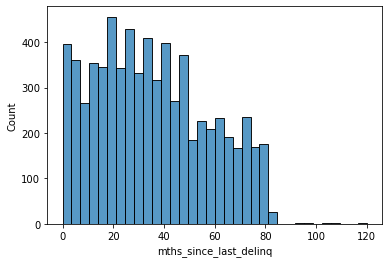

In [80]:
import seaborn as sns
sns.histplot(df['mths_since_last_delinq'])
# from 20 to 80 days the applicant is paying the charge-off amount in between lender is keeping a track of applicant's payment pattern

In [81]:
# Now we are converting days to months (ie for 30 days =1month)

# Calculating years
df['years'] = df['mths_since_last_delinq'] // 365

# Calculating months
df['months'] = (df['mths_since_last_delinq'] - df['years'] *365) // 30

In [82]:

df['months'].unique()

array([nan,  1.,  2.,  0.,  4.,  3.])

In [83]:
df['years'].unique()
#if no_days < 30 it will consider as zero months


array([nan,  0.])

In [84]:
# This shows each and every month
df['mths_since_last_delinq']=df['months']

In [85]:
df['mths_since_last_delinq'].unique()

array([nan,  1.,  2.,  0.,  4.,  3.])

In [86]:
df['mths_since_last_delinq'].mean()

0.7325479930191972

In [87]:
df['mths_since_last_delinq'].median()

1.0

In [88]:
df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].median,inplace=True)

In [89]:
df.isnull().sum()/len(df)

id                            0.00000
member_id                     0.00000
loan_amnt                     0.00000
funded_amnt                   0.00000
funded_amnt_inv               0.00000
term                          0.00000
int_rate                      0.00000
installment                   0.00000
grade                         0.00000
sub_grade                     0.00000
emp_title                     0.00000
emp_length                    0.00000
home_ownership                0.00000
annual_inc                    0.00000
verification_status           0.00000
issue_d                       0.00000
loan_status                   0.00000
pymnt_plan                    0.00000
url                           0.00000
purpose                       0.00000
title                         0.00000
zip_code                      0.00000
addr_state                    0.00000
dti                           0.00000
delinq_2yrs                   0.00000
earliest_cr_line              0.00000
inq_last_6mt

In [90]:
df.drop(['years'],inplace=True,axis=1)

In [91]:
df.drop(['months'],inplace=True,axis=1)

In [92]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,171.62,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,119.66,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,649.91,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,357.48,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,67.79,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [93]:
len(df.columns)

51

In [94]:
df['member_id'].unique()

array([1296599, 1314167, 1313524, ...,   90607,   90390,   89243],
      dtype=int64)

In [95]:
df.drop(['url'],inplace=True,axis=1)

In [96]:
df.drop(['member_id'],inplace=True,axis=1)

In [97]:
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [98]:
#whether they have took payment plan into action or not
# it is telling that theyhave not put actions to their lans 
df['pymnt_plan'].unique()

array(['n'], dtype=object)

In [99]:
df.drop(['addr_state','zip_code','policy_code','id'],inplace=True,axis=1)

In [100]:
df['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'D5', 'A5', 'A2', 'E4', 'D3', 'D4',
       'E3', 'F1', 'A3', 'E5', 'F3', 'E2', 'G3', 'G1', 'G4', 'F5', 'F4',
       'G2', 'G5'], dtype=object)

In [101]:
df['initial_list_status'].unique()

array(['f'], dtype=object)

In [102]:


df['earliest_cr_line'].unique()

array(['Jan-85', 'Apr-99', 'Nov-01', 'Feb-96', 'Jan-96', 'Nov-04',
       'Jul-05', 'Jan-07', 'Apr-04', 'Sep-04', 'Jan-98', 'Oct-89',
       'Jul-03', 'May-91', 'Sep-07', 'Oct-98', 'Aug-93', 'Oct-03',
       'Jan-01', 'Nov-97', 'Feb-83', 'Jul-85', 'Apr-03', 'Jun-01',
       'Feb-02', 'Nov-06', 'Feb-97', 'Dec-00', 'Apr-07', 'Dec-01',
       'Sep-98', 'Jun-04', 'Nov-95', 'Jul-99', 'Jun-95', 'Jan-02',
       'Oct-06', 'May-00', 'Dec-98', 'Oct-00', 'May-06', 'Oct-05',
       'Apr-95', 'Oct-02', 'Jan-00', 'Apr-00', 'Dec-94', 'Jun-03',
       'Jul-06', 'Oct-96', 'May-03', 'Jun-02', 'Jun-07', 'Dec-96',
       'Sep-02', 'May-98', 'Jan-97', 'Dec-04', 'Mar-04', 'Jul-95',
       'Aug-94', 'Jun-92', 'Mar-97', 'Apr-06', 'Apr-90', 'Aug-99',
       'Sep-00', 'Dec-88', 'Feb-99', 'Oct-04', 'Feb-05', 'Nov-00',
       'Jan-91', 'Jun-00', 'Aug-06', 'Dec-02', 'Jun-93', 'May-97',
       'Feb-04', 'Dec-90', 'Mar-00', 'Jul-01', 'Sep-06', 'Aug-98',
       'Oct-01', 'Jun-83', 'Feb-95', 'Apr-80', 'Jul-04', 'Jul-

In [103]:
#df['years'] = df['earliest_cr_line'] // 365

# Calculating months
#df['months'] = (df['mths_since_last_delinq'] - df['years'] *365) // 30

In [104]:
df['earliest_cr_line'] = df['earliest_cr_line'].str.replace('-',' ')# not req

In [105]:
df['earliest_cr_line'].unique()

array(['Jan 85', 'Apr 99', 'Nov 01', 'Feb 96', 'Jan 96', 'Nov 04',
       'Jul 05', 'Jan 07', 'Apr 04', 'Sep 04', 'Jan 98', 'Oct 89',
       'Jul 03', 'May 91', 'Sep 07', 'Oct 98', 'Aug 93', 'Oct 03',
       'Jan 01', 'Nov 97', 'Feb 83', 'Jul 85', 'Apr 03', 'Jun 01',
       'Feb 02', 'Nov 06', 'Feb 97', 'Dec 00', 'Apr 07', 'Dec 01',
       'Sep 98', 'Jun 04', 'Nov 95', 'Jul 99', 'Jun 95', 'Jan 02',
       'Oct 06', 'May 00', 'Dec 98', 'Oct 00', 'May 06', 'Oct 05',
       'Apr 95', 'Oct 02', 'Jan 00', 'Apr 00', 'Dec 94', 'Jun 03',
       'Jul 06', 'Oct 96', 'May 03', 'Jun 02', 'Jun 07', 'Dec 96',
       'Sep 02', 'May 98', 'Jan 97', 'Dec 04', 'Mar 04', 'Jul 95',
       'Aug 94', 'Jun 92', 'Mar 97', 'Apr 06', 'Apr 90', 'Aug 99',
       'Sep 00', 'Dec 88', 'Feb 99', 'Oct 04', 'Feb 05', 'Nov 00',
       'Jan 91', 'Jun 00', 'Aug 06', 'Dec 02', 'Jun 93', 'May 97',
       'Feb 04', 'Dec 90', 'Mar 00', 'Jul 01', 'Sep 06', 'Aug 98',
       'Oct 01', 'Jun 83', 'Feb 95', 'Apr 80', 'Jul 04', 'Jul 

## Data Analysis

In [106]:
import seaborn as sns

<AxesSubplot:>

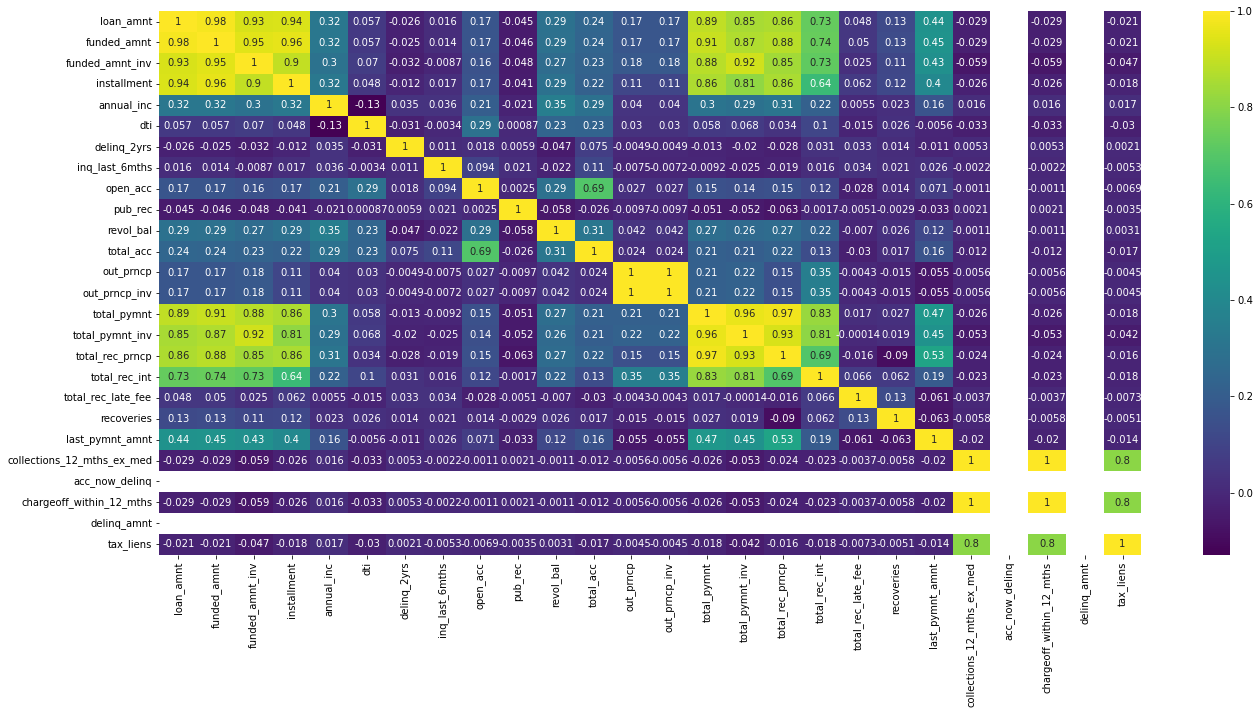

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
#loan _amunt and funded_mnt are highly correlated with 0.98%
#



In [108]:
df.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
loan_amnt,1.000000,0.983135,0.931740,0.935332,0.318199,0.056616,-0.025615,0.015546,0.170830,-0.045269,...,0.861265,0.731683,0.048091,0.125444,0.442659,-0.029418,NaN,-0.029418,NaN,-0.021199
funded_amnt,0.983135,1.000000,0.948422,0.959047,0.316906,0.057252,-0.025033,0.014464,0.169122,-0.046348,...,0.877919,0.736643,0.049808,0.127156,0.449096,-0.028836,NaN,-0.028836,NaN,-0.020649
funded_amnt_inv,0.931740,0.948422,1.000000,0.896088,0.298180,0.070437,-0.032449,-0.008693,0.156427,-0.047765,...,0.845478,0.726207,0.024974,0.113070,0.432037,-0.059241,NaN,-0.059241,NaN,-0.047481
installment,0.935332,0.959047,0.896088,1.000000,0.323179,0.047557,-0.011912,0.017468,0.165840,-0.041481,...,0.856843,0.636034,0.062159,0.115280,0.396033,-0.025933,NaN,-0.025933,NaN,-0.018213
annual_inc,0.318199,0.316906,0.298180,0.323179,1.000000,-0.129030,0.035337,0.036282,0.205270,-0.020757,...,0.308181,0.215316,0.005470,0.022680,0.164185,0.016449,NaN,0.016449,NaN,0.017042
dti,0.056616,0.057252,0.070437,0.047557,-0.129030,1.000000,-0.030988,-0.003407,0.286513,0.000866,...,0.034232,0.104933,-0.015251,0.025708,-0.005588,-0.032611,NaN,-0.032611,NaN,-0.030216
delinq_2yrs,-0.025615,-0.025033,-0.032449,-0.011912,0.035337,-0.030988,1.000000,0.011287,0.018375,0.005922,...,-0.028373,0.031405,0.033081,0.013755,-0.011264,0.005303,NaN,0.005303,NaN,0.002083
inq_last_6mths,0.015546,0.014464,-0.008693,0.017468,0.036282,-0.003407,0.011287,1.000000,0.093838,0.020857,...,-0.019174,0.015628,0.033730,0.020772,0.025606,-0.002189,NaN,-0.002189,NaN,-0.005265
open_acc,0.170830,0.169122,0.156427,0.165840,0.205270,0.286513,0.018375,0.093838,1.000000,0.002468,...,0.151277,0.116688,-0.028045,0.013951,0.071177,-0.001106,NaN,-0.001106,NaN,-0.006857
pub_rec,-0.045269,-0.046348,-0.047765,-0.041481,-0.020757,0.000866,0.005922,0.020857,0.002468,1.000000,...,-0.063058,-0.001664,-0.005089,-0.002918,-0.033381,0.002130,NaN,0.002130,NaN,-0.003461


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

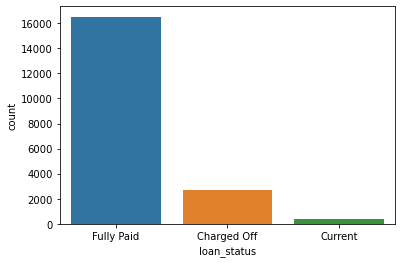

In [109]:
sns.countplot(df['loan_status'])
# Number of fully paid applicant are higher than the Charge-off and Current loan status

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp_length', ylabel='count'>

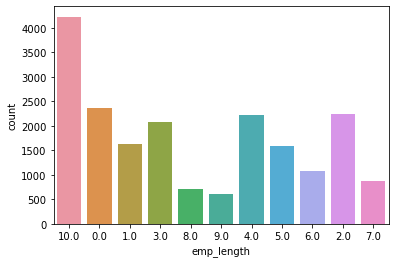

In [110]:
import seaborn as sns
sns.countplot(df['emp_length'])
#Mostly the employees who have applied for loan have an experience of More than 10 years

In [111]:
df.drop(['earliest_cr_line'],inplace=True,axis=1)

In [112]:
df['acc_now_delinq'].isnull().sum()

0

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chargeoff_within_12_mths', ylabel='count'>

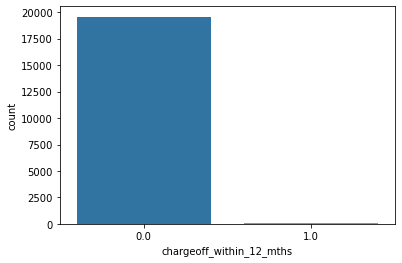

In [113]:
 import seaborn as sns
sns.countplot(df['chargeoff_within_12_mths'])
# Majority of the applicant didn't had any pending charge-offs 

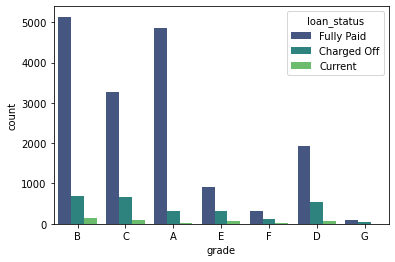

In [114]:

sns.countplot(data=df, x='grade', hue='loan_status',palette='viridis');
# Majority of the applicants which has fully paid falls into Grade B an also this is just showing the grades in which category does the applicant fall it has nothing to do with the loan status 

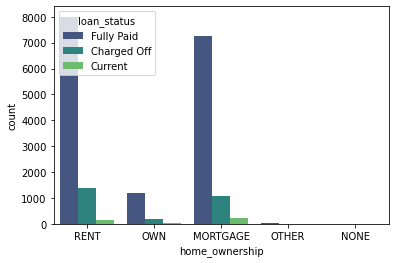

In [115]:
sns.countplot(data=df, x='home_ownership', hue='loan_status',palette='viridis');
#Person who are staying on rent are successfully paying the loan 

In [116]:
df['home_ownership'].value_counts()

RENT        9531
MORTGAGE    8573
OWN         1447
OTHER         62
NONE           3
Name: home_ownership, dtype: int64

In [117]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [118]:
df['open_acc'].unique()

array([ 3,  2, 10, 15,  9,  7,  4, 11, 14, 12, 20,  8,  6, 17,  5, 13, 16,
       30, 21, 19, 18, 23, 34, 25, 22, 24, 26, 28, 32, 27, 33, 29, 36, 31,
       35, 44, 42], dtype=int64)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='open_acc'>

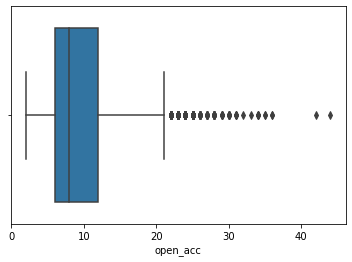

In [119]:
sns.boxplot(df['open_acc'])

In [120]:
upper_limit=df['open_acc'].mean()+ 3 * df['open_acc'].std()

In [121]:
lower_limit=df['open_acc'].mean()- 3 * df['open_acc'].std()

In [122]:


upper_limit,lower_limit#values which are upper than 22 and lower than -4.12 are outliers

(22.460982091600137, -4.1231966103603295)

In [123]:
((df['open_acc']>=upper_limit ) |(df['open_acc'] < lower_limit)).sum()

190

In [124]:
df[(df['open_acc']>upper_limit ) |(df['open_acc'] <=lower_limit)].head(10)
#these are outlier values

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
250,4000,4000,4000.0,36 months,19.03%,146.69,E,E2,IBM,10.0,...,0.0,0.0,785.51,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
760,25000,15925,15925.0,60 months,15.96%,386.93,C,C5,Cvs pharmacy,10.0,...,0.0,0.0,7507.67,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
916,7200,7200,7200.0,36 months,20.89%,270.86,F,F1,Ohio State University,0.0,...,0.0,448.2,541.72,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
1081,12000,12000,12000.0,60 months,20.89%,323.90,F,F1,Kaiser Permanente,3.0,...,0.0,0.0,7509.32,0.0,INDIVIDUAL,0,0.0,0,1.0,0.0
1506,31300,31300,31250.0,60 months,20.30%,834.50,E,E5,Solara hospital,10.0,...,0.0,0.0,30886.74,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
1697,5000,5000,5000.0,36 months,16.77%,177.70,D,D2,Wells Fargo,10.0,...,0.0,1261.0,177.70,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
2689,10000,10000,10000.0,60 months,18.64%,257.43,E,E1,"MtSAC, CitrusCollege, RCCNorco",4.0,...,0.0,0.0,7132.68,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
2801,14825,14825,14825.0,60 months,23.52%,422.37,G,G3,Columbia Hospital,1.0,...,0.0,499.1,844.74,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
2825,3000,3000,3000.0,36 months,20.30%,111.95,E,E5,Wal-mart,2.0,...,0.0,0.0,1670.88,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
2858,12000,12000,12000.0,60 months,15.27%,287.19,C,C4,Career Path Services,3.0,...,0.0,0.0,222.47,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0


<AxesSubplot:xlabel='term', ylabel='count'>

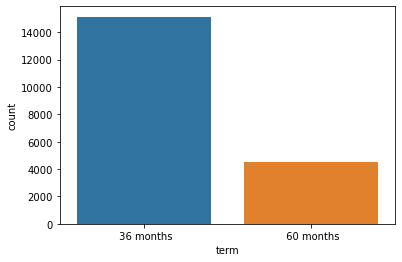

In [125]:
sns.countplot(data=df, x="term")
# most of the applicant has maximum tenure of 36 months

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

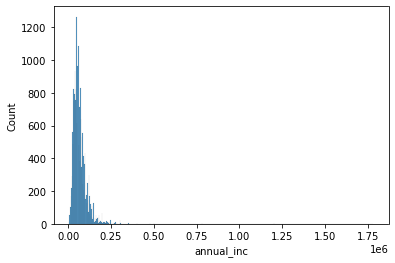

In [126]:
sns.histplot(df['annual_inc'])
#Most of the applicants are having income 0-50000

In [127]:
df['annual_inc'].value_counts()

60000.0    712
50000.0    533
40000.0    423
30000.0    413
45000.0    400
          ... 
14676.0      1
87192.0      1
37956.0      1
33196.0      1
27376.0      1
Name: annual_inc, Length: 3239, dtype: int64

<AxesSubplot:xlabel='dti', ylabel='Count'>

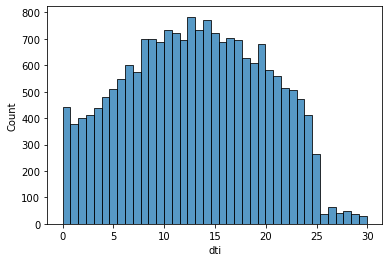

In [128]:
sns.histplot(df['dti'])
#here dti is showing the percentage from our monthly income to the amount which goes into paying monthly debt
#so Most of the dti lies between 5%-23%

<AxesSubplot:xlabel='purpose', ylabel='count'>

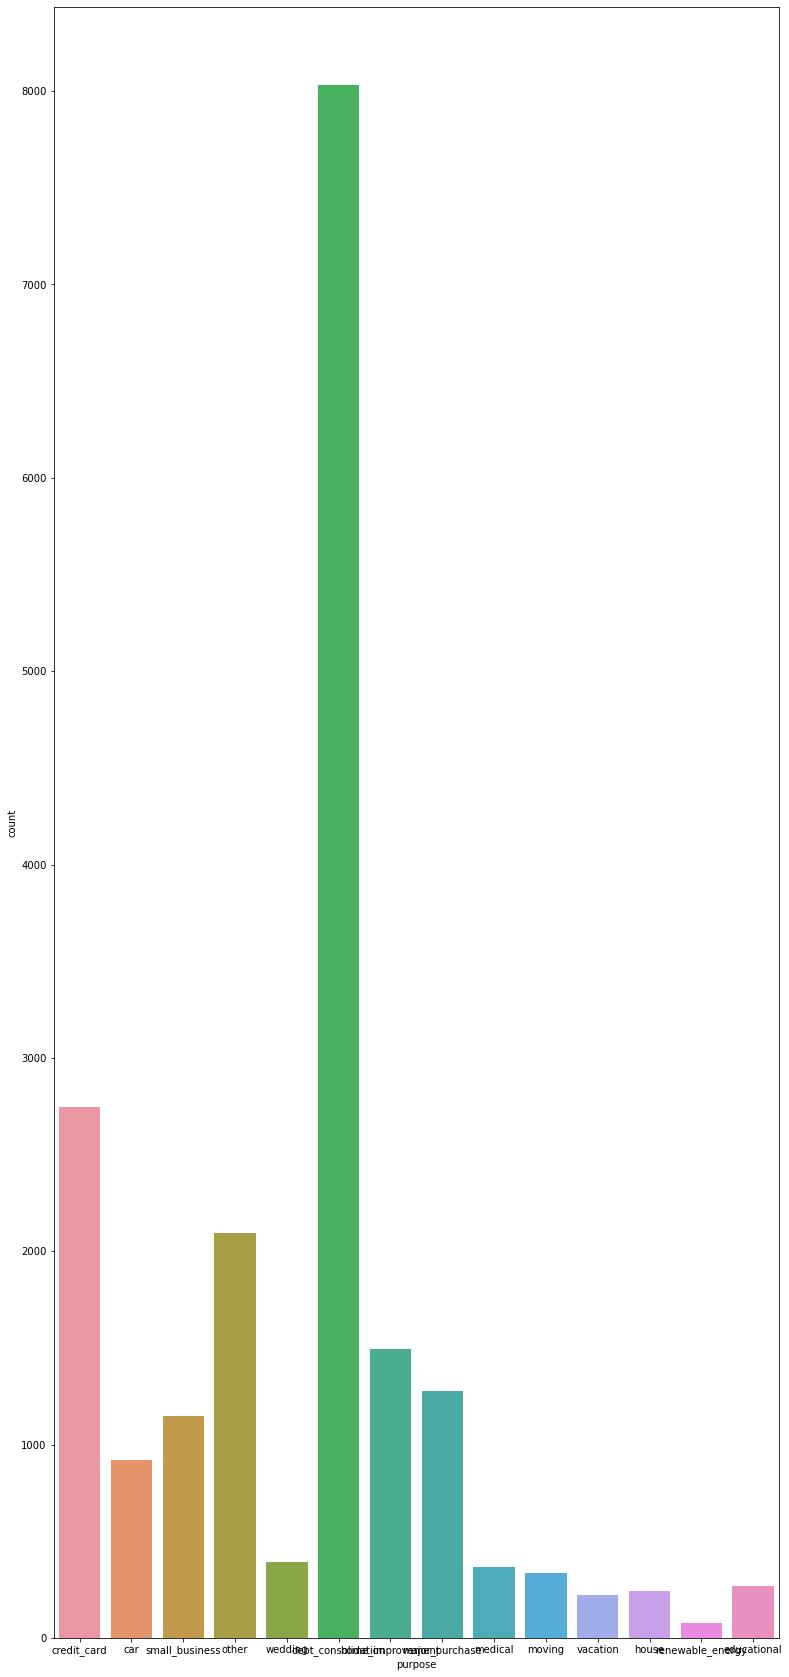

In [129]:
plt.figure(figsize=(13,30))
sns.countplot(data=df, x="purpose")
#Majority of applicants are applying loan for debt_consolidation

In [130]:
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

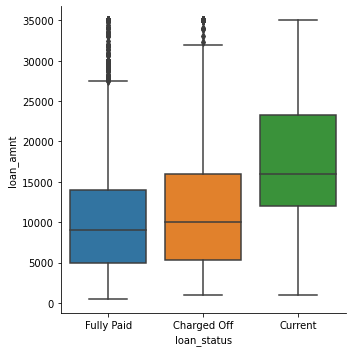

In [131]:
sns.catplot(data=df, x="loan_status", y="loan_amnt", kind="box")
#This shows the data dispersion and we can see the data is majorly dispersed in 'Current'
#Current is starting from 0-13000/- we don't have any amount and then the loan_amnt for Current starts from 15000/-to 23000/-
#In Fully paid loan amount is stating from 5000/- to 14000/- 
#In Charge-off 5000/- to 16000/-
#In Current the avg loan amount paid is  12000/- to 16000/-
#Average loan amount paid for charged-off is 10000/-
#average loan amount Fully paid is 9000/-

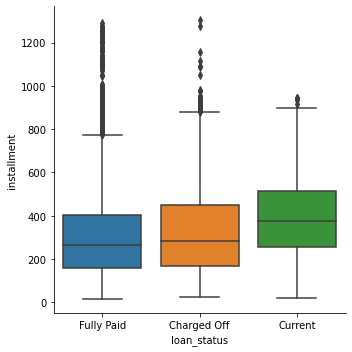

In [132]:
sns.catplot(data=df, x="loan_status", y="installment", kind="box")

# Avg installments paid by fully paid applicant is approx 300/-

#Avg installments paid by Charge off applicant is approx 290/-

#Avg installments paid by Charge off applicant is approx 390/-


In [194]:
df['loan_amnt'].max()

35000

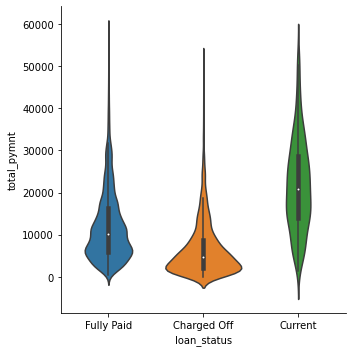

In [133]:
sns.catplot(
    data=df, x="loan_status", y="total_pymnt",
    kind="violin"
)
# for fully paid avg amount is 10000/- and the density is higher between 5000/-to 15000/-
#for charged off avg amount is 5000/-  and high density is between 4000 to 8000
#for Current avg would be 22000 and the density is higher density is between 13000 to 29000



C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='out_prncp'>

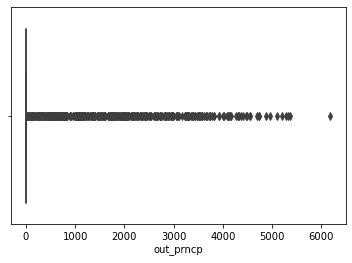

In [134]:
sns.boxplot(df['out_prncp'])

In [135]:
# for IQR 

IQR=df['out_prncp'].quantile(0.75)- df['out_prncp'].quantile(0.25)

upper_limit=df['out_prncp'].quantile(0.75)+(IQR*1.5)
lower_limit=df['out_prncp'].quantile(0.25)-(IQR*1.5)

In [136]:
upper_limit,lower_limit

(0.0, 0.0)

In [137]:
((df['out_prncp']< upper_limit ) |(df['out_prncp'] > lower_limit)).sum()

403

In [138]:
df[(df['out_prncp']< upper_limit ) |(df['out_prncp'] > lower_limit)].head(10)
#these are outlier values

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1.0,...,0.0,0.0,67.79,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
32,10000,10000,9975.0,60 months,15.96%,242.97,C,C5,US Legal Support,2.0,...,0.0,0.0,242.97,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
39,12500,12500,12475.0,60 months,12.69%,282.44,B,B5,United States Infrastructure Corporation,1.0,...,0.0,0.0,282.44,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
86,14000,14000,13975.0,60 months,17.27%,349.98,D,D3,community colleges of spokane,4.0,...,0.0,0.0,349.98,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
99,6000,6000,6000.0,60 months,12.69%,135.57,B,B5,Anadarko Petroleum Corporation,0.0,...,0.0,0.0,135.57,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
184,11000,11000,10750.0,60 months,13.49%,253.06,C,C1,Department Of Health,10.0,...,0.0,0.0,253.06,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
261,12300,12300,12300.0,60 months,13.49%,282.96,C,C1,gem city motors,2.0,...,0.0,0.0,282.96,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
285,18000,18000,17975.0,60 months,15.27%,430.78,C,C4,Latique handbag,1.0,...,0.0,0.0,430.78,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
321,20000,20000,19950.0,60 months,14.65%,472.14,C,C3,Micro/Sys,2.0,...,0.0,0.0,472.14,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
327,18000,18000,18000.0,60 months,19.03%,467.23,E,E2,institute for family health,3.0,...,0.0,0.0,467.23,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='funded_amnt'>

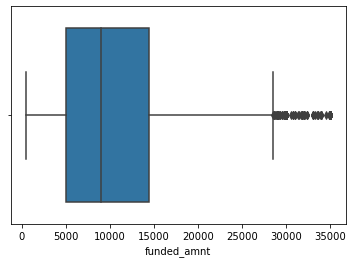

In [139]:
sns.boxplot(df['funded_amnt'])

In [140]:

IQR=df['funded_amnt'].quantile(0.75)- df['funded_amnt'].quantile(0.25)

upper_limit=df['funded_amnt'].quantile(0.75)+(IQR*1.5)
lower_limit=df['funded_amnt'].quantile(0.25)-(IQR*1.5)

In [141]:
upper_limit,lower_limit

(28500.0, -9100.0)

In [142]:
((df['funded_amnt']< upper_limit ) |(df['funded_amnt'] > lower_limit)).sum()

19616

In [143]:
#df[(df['funded_amnt']< upper_limit ) |(df['funded_amnt'] > lower_limit)].head(10)
#these are outlier values

<AxesSubplot:xlabel='total_acc', ylabel='loan_status'>

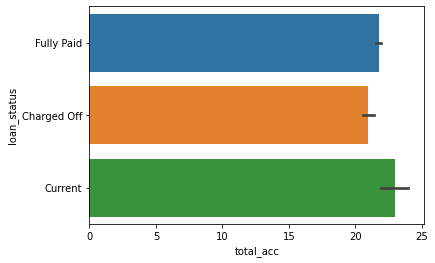

In [145]:
sns.barplot(x=df['total_acc'], y=df['loan_status'],data=df)
#Most of the Current applicant has higher credit line

<AxesSubplot:xlabel='total_rec_prncp', ylabel='loan_status'>

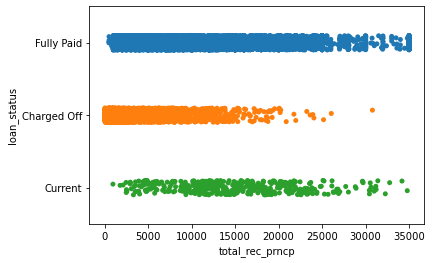

In [146]:
sns.stripplot(x=df["total_rec_prncp"],y=df["loan_status"])
# Most of the principal Amount is received from applicant who have fully paid loan

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_rec_prncp'>

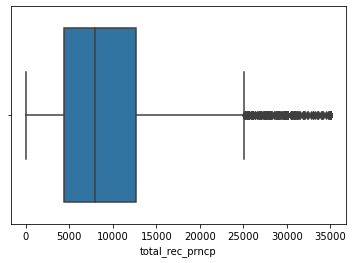

In [147]:
sns.boxplot(df['total_rec_prncp'])

In [148]:

IQR=df['total_rec_prncp'].quantile(0.75)- df['total_rec_prncp'].quantile(0.25)

upper_limit=df['total_rec_prncp'].quantile(0.75)+(IQR*1.5)
lower_limit=df['total_rec_prncp'].quantile(0.25)-(IQR*1.5)

In [149]:
upper_limit,lower_limit

(25061.896249999998, -8098.773749999999)

In [150]:
((df['total_rec_prncp']< upper_limit ) |(df['total_rec_prncp'] > lower_limit)).sum()

19616

In [151]:
#df[(df['total_rec_prncp']< upper_limit ) |(df['total_rec_prncp'] > lower_limit)].head(10)
#these are outlier values

In [153]:
df['tax_liens'].unique()

array([0., 1.])

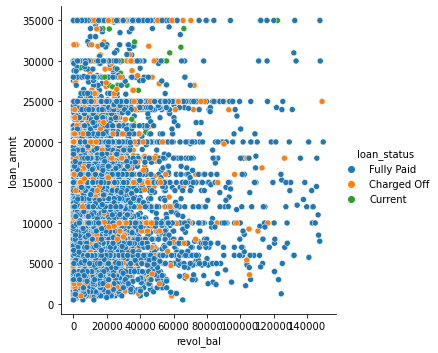

In [154]:
sns.relplot(x ="revol_bal", y ="loan_amnt",hue='loan_status',
            data = df);

# There is a constant relation of revol_bal and the loan_amnt
#Fully paid are able to pay the amount sucessfully

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='inq_last_6mths'>

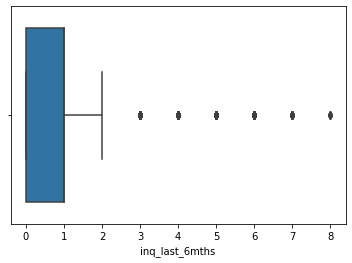

In [155]:
sns.boxplot(df['inq_last_6mths'])

In [156]:
avg_annual_income=df.groupby('term').agg({'annual_inc':'mean'})

<AxesSubplot:xlabel='term'>

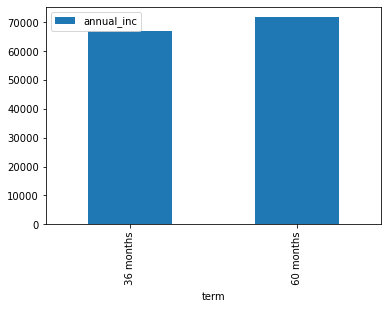

In [157]:
avg_annual_income.plot(kind='bar')
#average annual income for each term is same in both the terms 

<AxesSubplot:xlabel='dti', ylabel='loan_status'>

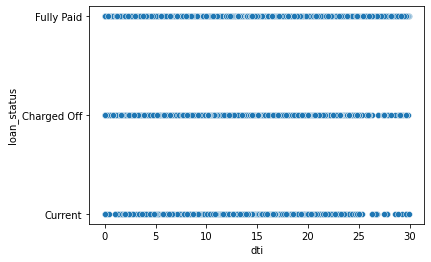

In [190]:
sns.scatterplot(x=df["dti"],y=df["loan_status"])

In [159]:
avg_dti=df.groupby('term').agg({'dti':'mean'})

<AxesSubplot:xlabel='term'>

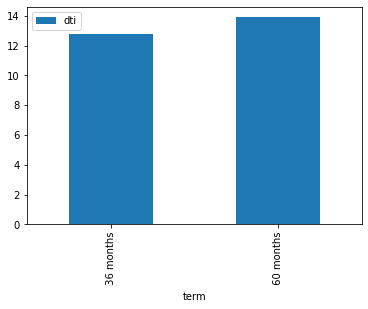

In [160]:
avg_dti.plot(kind='bar')

In [161]:
#df['mths_since_last_delinq'].unique()

In [162]:
df.drop(['mths_since_last_delinq'],inplace=True,axis=1)

In [163]:
df['total_rec_int'].unique()

array([ 863.16,  435.17,  605.67, ...,  804.73, 1413.49,  174.2 ])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_rec_int'>

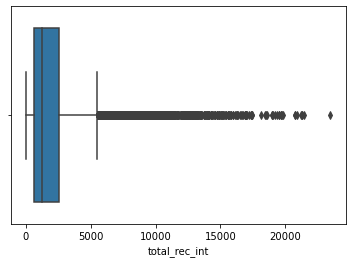

In [164]:
sns.boxplot(df['total_rec_int'])

In [165]:

IQR=df['total_rec_int'].quantile(0.75)- df['total_rec_int'].quantile(0.25)

upper_limit=df['total_rec_int'].quantile(0.75)+(IQR*1.5)
lower_limit=df['total_rec_int'].quantile(0.25)-(IQR*1.5)

In [166]:
upper_limit,lower_limit

(5523.7225, -2331.8975)

In [167]:
((df['total_rec_int']< upper_limit ) |(df['total_rec_int'] > lower_limit)).sum()

19616

In [168]:
#df[(df['total_rec_int']< upper_limit ) |(df['total_rec_int'] > lower_limit)].head(10)

<AxesSubplot:xlabel='total_rec_int', ylabel='loan_amnt'>

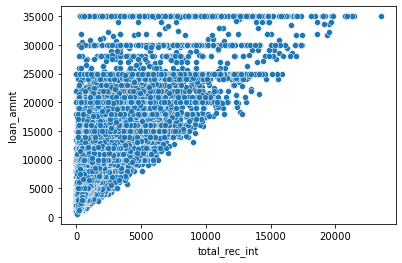

In [169]:
sns.scatterplot(x=df['total_rec_int'],y=df['loan_amnt'])

In [170]:

df['delinq_2yrs'].unique()

array([ 0,  2,  3,  1,  4,  5,  6,  7, 11], dtype=int64)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delinq_2yrs', ylabel='count'>

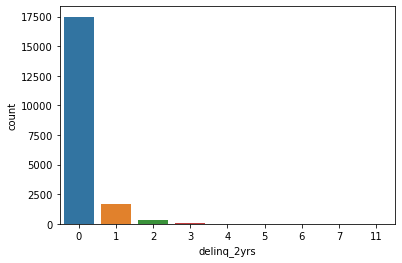

In [171]:
sns.countplot(df['delinq_2yrs'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delinq_2yrs'>

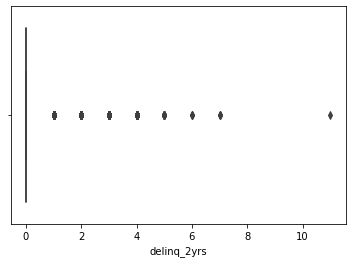

In [172]:
sns.boxplot(df['delinq_2yrs'])

In [173]:
IQR=df['delinq_2yrs'].quantile(0.75)- df['delinq_2yrs'].quantile(0.25)

upper_limit=df['delinq_2yrs'].quantile(0.75)+(IQR*1.5)
lower_limit=df['delinq_2yrs'].quantile(0.25)-(IQR*1.5)

In [174]:
upper_limit,lower_limit

(0.0, 0.0)

In [175]:
((df['delinq_2yrs']< upper_limit ) |(df['delinq_2yrs'] > lower_limit)).sum()

2132

In [176]:
df[(df['delinq_2yrs']< upper_limit ) |(df['delinq_2yrs'] > lower_limit)].head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
18,6000,6000,6000.00000,36 months,11.71%,198.46,B,B3,Connection Inspection,1.0,...,15.0,0.00,16.98,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
27,5000,5000,5000.00000,60 months,16.77%,123.65,D,D2,Frito Lay,2.0,...,0.0,260.96,123.65,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
93,10500,10500,10500.00000,36 months,12.69%,352.23,B,B5,O'Connor,10.0,...,0.0,0.00,4421.32,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
99,6000,6000,6000.00000,60 months,12.69%,135.57,B,B5,Anadarko Petroleum Corporation,0.0,...,0.0,0.00,135.57,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
147,21600,21600,20498.26578,60 months,19.42%,565.32,E,E3,State of Georgia/United States Air Force,8.0,...,0.0,0.00,17416.49,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
148,6000,6000,6000.00000,36 months,10.65%,195.44,B,B2,Medin Corporation,6.0,...,0.0,0.00,1335.92,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
161,15000,15000,15000.00000,36 months,17.27%,536.81,D,D3,Senior Dental Insurance Solutions,2.0,...,0.0,0.00,9412.40,0.0,INDIVIDUAL,0,0.0,0,1.0,0.0
170,25000,25000,25000.00000,36 months,12.42%,835.39,B,B4,McGraw- Hill,2.0,...,0.0,0.00,842.08,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
185,35000,35000,35000.00000,36 months,10.65%,1140.07,B,B2,baylor college of medicine,2.0,...,0.0,0.00,272.59,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
228,1500,1500,1500.00000,36 months,17.27%,53.69,D,D3,Walt Disney Co.,10.0,...,0.0,0.00,1521.89,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='verification_status', ylabel='count'>

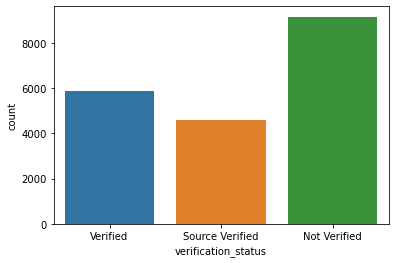

In [177]:
sns.countplot(df['verification_status'])

<AxesSubplot:xlabel='last_pymnt_amnt', ylabel='loan_status'>

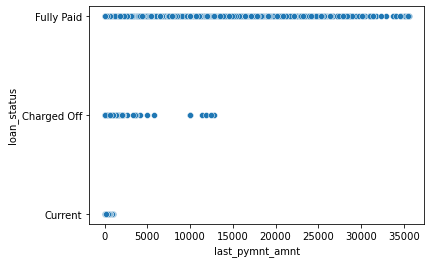

In [178]:
sns.scatterplot(x=df['last_pymnt_amnt'],y=df['loan_status'])

<AxesSubplot:xlabel='dti', ylabel='loan_status'>

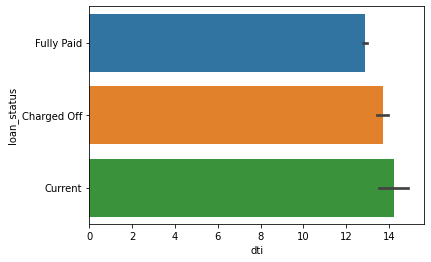

In [179]:
sns.barplot(x=df['dti'], y=df['loan_status'],data=df)
#In comparison of fully paid and charged-off apllicants, Current applicant are tend to pay more dti amount

<AxesSubplot:xlabel='chargeoff_within_12_mths', ylabel='loan_status'>

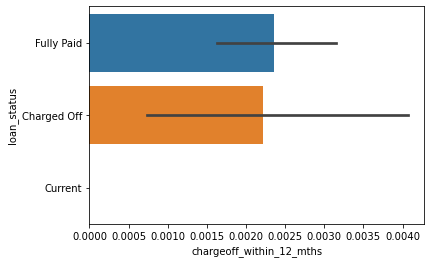

In [180]:
sns.barplot(x=df['chargeoff_within_12_mths'], y=df['loan_status'],data=df)
#most of the aare charged-off within 

<AxesSubplot:xlabel='total_rec_late_fee', ylabel='loan_status'>

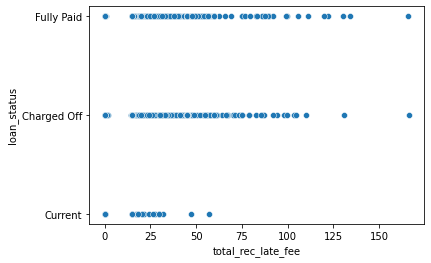

In [181]:
sns.scatterplot(x=df['total_rec_late_fee'],y=df['loan_status'])
# This show that there is no relation between both of these variables

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tax_liens', ylabel='count'>

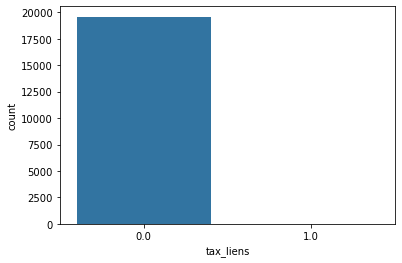

In [182]:
sns.countplot(df['tax_liens'])
# most of the people do not have any clain against there properties

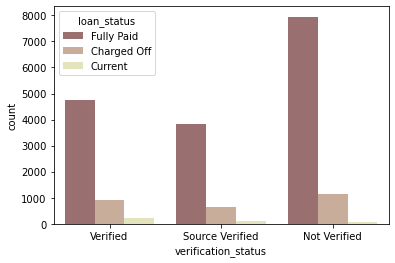

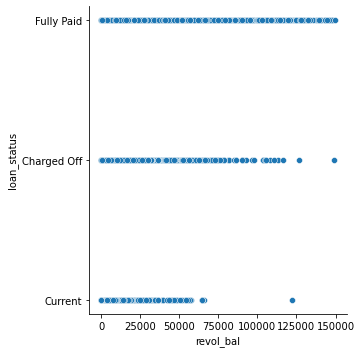

In [195]:
sns.countplot(x="verification_status", hue = 'loan_status', palette="pink", data=df)


#  Most of the fully paid applicants are not verified

### Loan Amount helped to understand the amount which is current or ongoing loan amount

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

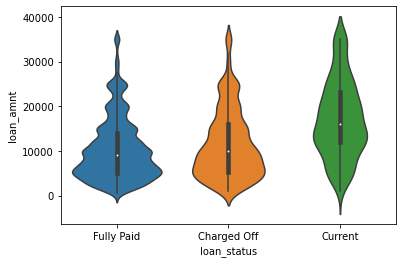

In [186]:
sns.violinplot(x=df['loan_status'],y=df['loan_amnt'])

#probability of fully paid loan amount is higher between 5000/- to 15000/-
#probability of charged=off loan amount is higher between 5000/- to 18000/-
#Probability of Current loan amount is higher between 9000/- to 23000/- 
#Avg amount is 10000/- and the density is higher between 5000/-to 10000/-
#for charged off avg amount is 10000/-  and high density is between 5000/- to 9000/-
#for Current avg would be 12000/- and the density is higher density is between 5000/- to 15000/-



<AxesSubplot:xlabel='dti', ylabel='loan_amnt'>

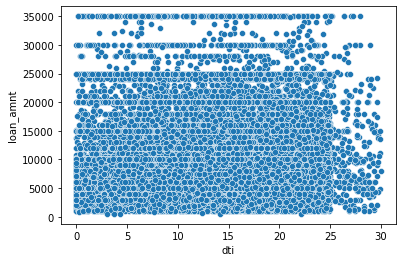

In [187]:
sns.scatterplot(x=df['dti'],y=df['loan_amnt'])
#There is a constant relationship between the two variables None of the variables are affecting each other

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

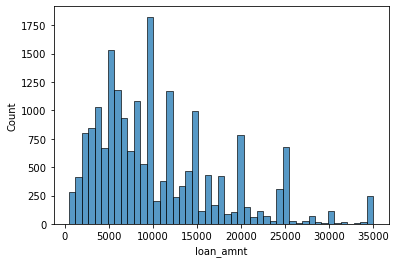

In [189]:
sns.histplot(df['loan_amnt'])
#Most of the loan amount is between 5000/- to 10000/-

In [191]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

<AxesSubplot:xlabel='loan_status', ylabel='total_pymnt'>

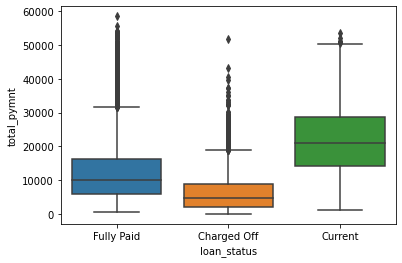

In [192]:
sns.boxplot(x ='loan_status', y ='total_pymnt', data = df)